# TP 1 - Équation de la chaleur
## Schéma explicite

On résout numériquement l'équation de la chaleur sur $\Omega:=]-L,L[$ avec conditions aux limites de Dirichlet

$$ \frac{\partial u}{\partial t}(x,t)-\frac{\partial^2 u}{\partial x^2}(x,t) = 0,\quad x \in \Omega,\quad t \gt 0,\\
u(-L,t)=u(L,t)=0,\quad t > 0,\\
u(x,0)=u_0(x),\quad x \in \Omega, $$

et schéma explicite :

$$ \frac{u_j^{n+1}-u_j^n}{\Delta t}-\frac{u_{j+1}^n-2u_j^n+u_{j-1}^n}{\Delta x^2} = 0. $$ 

Tâche 1 :

   Resolving package versions...


  No Changes to `C:\Users\flore\.julia\environments\v1.8\Project.toml`
  No Changes to `C:\Users\flore\.julia\environments\v1.8\Manifest.toml`

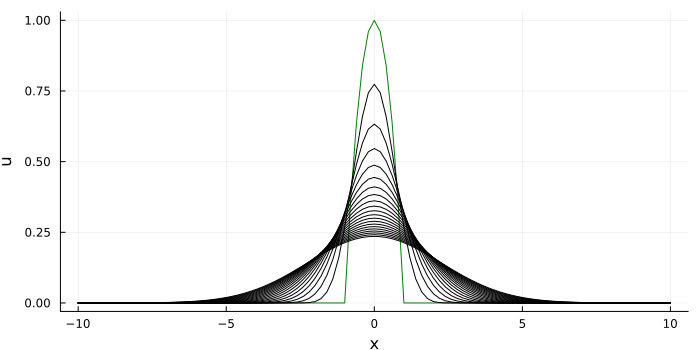

In [95]:
import Pkg; Pkg.add("Plots")
using LinearAlgebra, Plots
#intervalle de temps de plus en plus petit le mettre dans un vecteur et tracer 1 ère heure . Faire la m^me chose ensuite pour le teta schéma 
#ajouter une matrice 2 lignes en plus
# Parameters 
L = 10.0      #L augmente la diffusion lorsque sa valeur augmente                     # domain half size
Nx = 100    #Nx correspond aux nombres de points                        # grid size (space)
Δx = 2*L/Nx  #le pas en espace                       # step size (space)
σ = 0.3     #stabilité du schéma                      # CFL 
#Δt = σ * Δx^2  
Δt=0.0000001                      # step size (time)
Nt = 200                               # grid size (time)
x = range(-L, L, length=Nx+1)     #partition uniforme linspace     # grid (space)
u0 = max.(0, 1 .- x.^2)                # initial condition
# Explicit scheme
u = u0 #initialisation uo n'est pas une fonction 
u_plot = plot(x, u, xlabel="x", ylabel="u", color=:green, legend=false) #dessiner

   #schéma écriture matriciel du schéma explicite*

B= Tridiagonal(σ*ones(Nx), 1 .- 2*σ*ones(Nx+1), σ*ones(Nx))
for n = 1:Nt  # boucle en temps
    u = B*u  #un+1=b*un
    if mod(n, Nt/20) == 0
        plot!(u_plot, x, u, xlabel="x", ylabel="u", color=:black, legend=false)   
    end
end
display(plot(u_plot, size=(700, 350)))

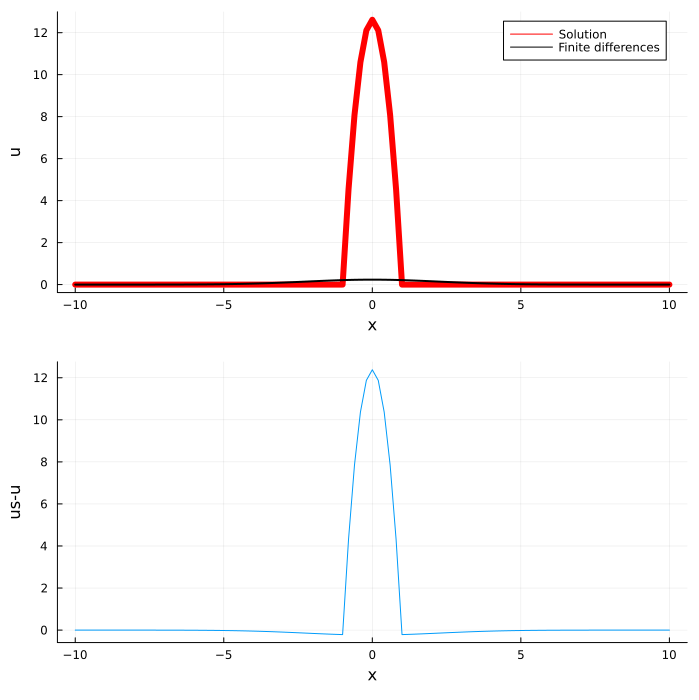

Δx: 0.2	 Δt:1.0e-7	 max error: 12.380191993824006


In [96]:
# Comparison with exact solution (computed convoluting with Gaussian kernel)
us = zeros(Nx+1)
ker = exp.( -((0:Nx)*Δx).^2 / (4*Nt*Δt) )
kmax = findall(x -> x < 1e-14, ker)
kmax = length(kmax) > 0 ? kmax[1] : error("Increase Nx")

for j = 1:(Nx+1)
    jmin = max(1, j-kmax)
    jmax = min(Nx+1, j+kmax)
    us[j] = Δx * sum( u0[jmin:jmax].*ker[1 .+ abs.(j.-(jmin:jmax))] ) / sqrt(4*π*Nt*Δt)
end

err = us-u
us_plot = plot(x, us, xlabel="x", ylabel="us", color=:red, label="Solution", lw=6)
plot!(us_plot, x, u, xlabel="x", ylabel="u", color=:black, label="Finite differences", lw=2)
err_plot = plot(x, err, xlabel="x", ylabel="us-u", legend=false)
display(plot(us_plot, err_plot, layout=(2, 1), size=(700, 700)))
println("Δx: ", Δx, "\t Δt:", Δt, "\t max error: ", maximum(abs.(err)))

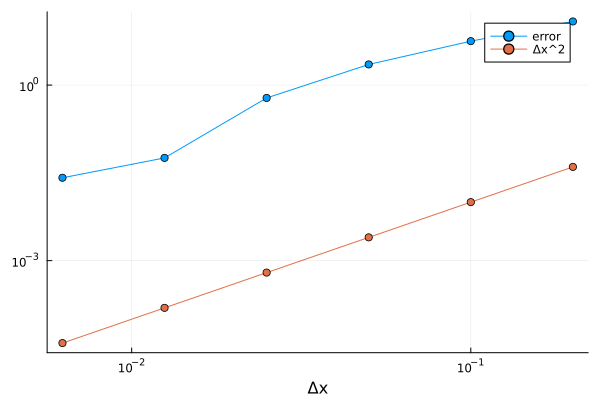

In [97]:
# Precision test   # on fixe delta  t très petit. delta x = 0.2 ensuite on diivse pas 2 puis par 2 etc.  
#on met tous les deltat x dans un vecteur. et on rajoute l'erreur qu'on a obtenu
#on devrait voir que l'erreur tant vers 0 comme delta x^2
#err = c*deltax^2
#log10 erreur = c+2*log 10 (delta x)

Δx = [ 0.2, 0.1 , 0.05,0.025,0.0125 ]
errx = [ 12.22245197268432,5.631858890978019,2.253617544959731,0.6032332453396727,0.05700103482349171 ] 
plot(Δx, errx, xaxis=:log, yaxis=:log, marker=:dot, xlabel="Δx", label="error")
plot!(Δx, Δx.^2, xaxis=:log, yaxis=:log, marker=:dot, xlabel="Δx", label="Δx^2")

On a fixé un Δt très petit de manière à ce que l'erreur ne dépende que de Δx. On remarque en faisant progressivement diminuer Δx (En fixant L et en doublant la valeur de Nt à chaque fois) que l'erreur diminue aussi. Cela est cohérent puisque l'erreur en en O(Δt)+O(Δx²).

Tâche 2 :

   Resolving package versions...


  No Changes to `C:\Users\flore\.julia\environments\v1.8\Project.toml`
  No Changes to `C:\Users\flore\.julia\environments\v1.8\Manifest.toml`

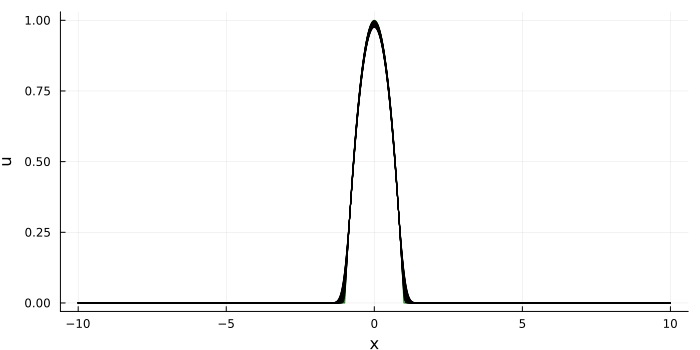

In [98]:
import Pkg; Pkg.add("Plots")
using LinearAlgebra, Plots

# Parameters
L = 10.0                              # domain half size
Nx = 800                                 # grid size (space)
Δx =2*L/Nx                            # step size (space)
σ = 0.1                                # CFL
Δt =σ * Δx^2                          # step size (time)
Nt = 200                               # grid size (time)
x = range(-L, L, length=Nx+1)          # grid (space)
u0 = max.(0, 1 .- x.^2)                # initial condition
theta = 0.75

# Explicit scheme
u = u0
u_plot = plot(x, u, xlabel="x", ylabel="u", color=:green, legend=false)

B = Tridiagonal(theta*σ*ones(Nx), 1 .- 2*theta*σ*ones(Nx+1), theta*σ*ones(Nx))
A = Tridiagonal(-(1-theta)*σ*ones(Nx), 1 .+ 2*σ*(1-theta)*ones(Nx+1), -(1-theta)*σ*ones(Nx))

for n = 1:Nt
    u = A\(B*u)
    if mod(n, Nt/20) == 0
        plot!(u_plot, x, u, xlabel="x", ylabel="u", color=:black, legend=false)
    end
end
display(plot(u_plot, size=(700, 350)))

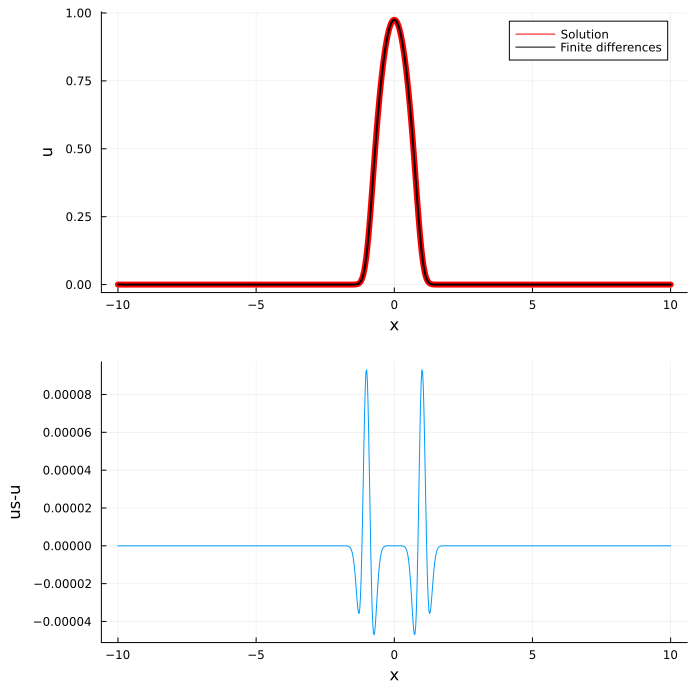

Δx: 0.025	 Δt:6.250000000000001e-5	 max error: 9.307816887538234e-5


In [99]:
# Comparison with exact solution (computed convoluting with Gaussian kernel)
us = zeros(Nx+1)
ker = exp.( -((0:Nx)*Δx).^2 / (4*Nt*Δt) )
kmax = findall(x -> x < 1e-14, ker)
kmax = length(kmax) > 0 ? kmax[1] : error("Increase Nx")

for j = 1:(Nx+1)
    jmin = max(1, j-kmax)
    jmax = min(Nx+1, j+kmax)
    us[j] = Δx * sum( u0[jmin:jmax].*ker[1 .+ abs.(j.-(jmin:jmax))] ) / sqrt(4*π*Nt*Δt)
end

err = us-u
us_plot = plot(x, us, xlabel="x", ylabel="us", color=:red, label="Solution", lw=6)
plot!(us_plot, x, u, xlabel="x", ylabel="u", color=:black, label="Finite differences", lw=2)
err_plot = plot(x, err, xlabel="x", ylabel="us-u", legend=false)
display(plot(us_plot, err_plot, layout=(2, 1), size=(700, 700)))
println("Δx: ", Δx, "\t Δt:", Δt, "\t max error: ", maximum(abs.(err)))

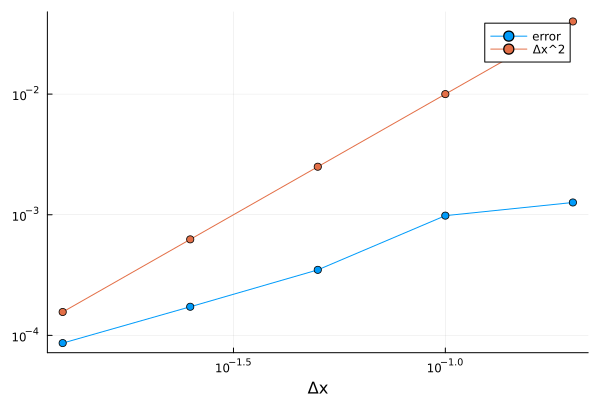

In [100]:
# Erreur en fonction de Δx pour theta = 0.25
Δx = [ 0.2 , 0.1 , 0.05 , 0.025 , 0.0125 ]
errx = [ 0.0012637073723971715 , 0.0009829259185635264 , 0.00034931183793660003 , 0.00017268298396112824 , 8.634149198051555e-5]
plot(Δx, errx, xaxis=:log, yaxis=:log, marker=:dot, xlabel="Δx", label="error")
plot!(Δx, Δx.^2, xaxis=:log, yaxis=:log, marker=:dot, xlabel="Δx", label="Δx^2")

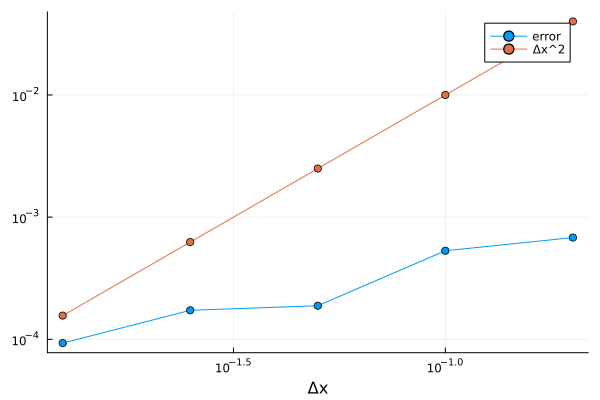

In [101]:
# Erreur en fonction de Δx pour theta = 0.75
Δx = [ 0.2 , 0.1 , 0.05 , 0.025 , 0.0125 ]
errx = [ 0.0006804487649800239 , 0.0005307926002003915 , 0.00018830102723313424 , 0.00017268298396112824 , 9.307816887538234e-5]
plot(Δx, errx, xaxis=:log, yaxis=:log, marker=:dot, xlabel="Δx", label="error")
plot!(Δx, Δx.^2, xaxis=:log, yaxis=:log, marker=:dot, xlabel="Δx", label="Δx^2")

On en conclut que la valeur de theta n'a pas une grande importance sur l'erreur qui reste très petite pour theta compris entre 0 et 1 mais qu'en revanche sigma influe beaucoup sur celle ci.